# Problem 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

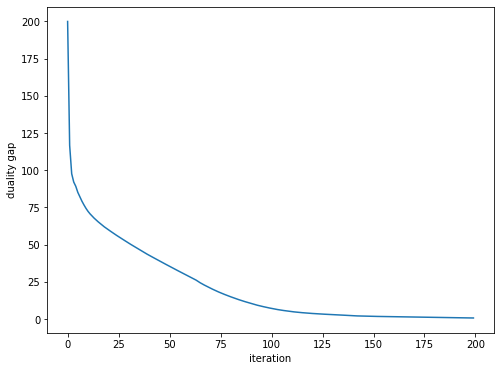

In [3]:
s = []
alphas = []
K = ((y_d4*x_d4.T).T @ (y_d4*x_d4.T))

ones = np.ones(n)
zeros = np.zeros(n)

lr=1e-2
lamb = 1
alpha = np.zeros(n)
w = 1/2/lamb*(alpha* y_d4*x_d4.T).sum(axis=1)

for i in range(200):
    primary = np.sum(np.max([zeros,1-y_d4*(w @ x_d4.T)], axis=0)) + lamb * (w @ w)
    dual = -1/4/lamb * (alpha @ K @ alpha) + alpha @ ones
    s.append((primary, dual))
    alphas.append(alpha)
    alpha = np.clip(alpha - lr*(1/2/lamb * K @ alpha-1), 0, 1)
    w = 1/2/lamb*(alpha*y_d4*x_d4.T).sum(axis=1)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.array(s)[:,0]-np.array(s)[:,1])
ax.set_xlabel('iteration')
ax.set_ylabel('duality gap')
# ax.set_yscale('log')
plt.show()